<a href="https://colab.research.google.com/github/recfordrem73/recfordrem/blob/child-branch/%D0%94%D0%BE%D0%BF_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BD%D0%B0_%D0%B7%D0%B0%D0%BA%D1%80%D0%B5%D0%BF%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D0%B0_%D0%BF%D0%BE_%D0%BD%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA%D1%83_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Доп задания на закрепление материала

In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [2]:
import numpy as np
np.arange(1,101).reshape(10,10)[::2,::2]


array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [3]:
# решение с использованием numpy
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

# ваш код тут
def sr_ar(x):
  me=sum(x)/len(x)
  return me
print(sr_ar(range(100000000)))


49999999.5
CPU times: user 2.56 s, sys: 13.5 ms, total: 2.57 s
Wall time: 2.63 s


In [4]:
# решение без использования numpy
# для оценки времени исоплнения блока
%%time
# ваш код тут
np.mean(np.arange(100000000))

CPU times: user 211 ms, sys: 244 ms, total: 455 ms
Wall time: 455 ms


49999999.5

## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [5]:
# задано изначально
import numpy as np
import pandas as pd
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))
s[s>5].index[0]


1

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

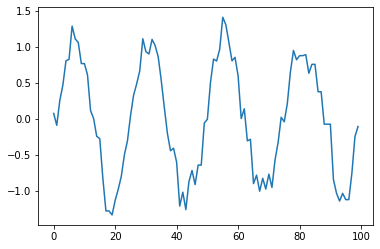

In [6]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
for i in df['target'].index:
  if np.isnan(df['target'][i])==True and i!=0:
    df['target'][i]=df['target'][i-1]
# отобразим
plt.plot(df.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [7]:
import pandas as pd
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут
df[df['возраст']>40]
df[df['доход']>df.доход.mean()]
df[(df.доход>df.доход.mean()) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())]

df['важность клиента']=df['доход']*df['надежность клиента (0..1)']
df
df['возможная долгосрочность клиента']=df['важность клиента']*(df['возраст'].mean()-df['возраст'])
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## Задание 6

Посмотрите на блок Exploratory data analysis, используйте данные, кототрые вы загрузили в ходе его освоения. Ваша задача - вывести имена всех выживших детей и их количество

In [8]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [9]:
sc=data.Name[(data['Age']<18)&(data['Survived']==1)].values
print(sc, len(sc))

['Mrs. Nicholas (Adele Achem) Nasser' 'Miss. Marguerite Rut Sandstrom'
 'Miss. Anna McGowan' 'Miss. Jamila Nicola-Yarred'
 'Miss. Simonne Marie Anne Andree Laroche' 'Miss. Constance Mirium West'
 'Master. Gerios Moubarek' 'Miss. Erna Alexandra Andersson'
 'Master. Alden Gates Caldwell' 'Miss. Bertha Ilett'
 'Master. Elias Nicola-Yarred' 'Miss. Anna Peter'
 'Miss. Katherine Gilnagh' 'Master. Frank John William Goldsmith'
 'Miss. Eleanor Ileen Johnson' 'Master. Richard F Becker'
 'Miss. Luise Gretchen Kink-Heilmann' 'Master. Michel M Navratil'
 'Miss. Helen Carr' 'Mr. Victor Francis Sunderland'
 'Miss. Lillian Gertrud Asplund' 'Miss. Marjorie Collyer'
 'Master. Edvin Rojj Felix Asplund' 'Master. Hudson Trevor Allison'
 'Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo) Penasco y Castellana'
 'Miss. Jean Gertrude Hippach' 'Master. Edmond Roger Navratil'
 'Master. William Loch Coutts' 'Miss. Maria Nakid' 'Miss. Bertha Lehmann'
 'Master. William Rowe Richards' 'Miss. Lucile Polk 